In [1]:
#Lendo os dataframes
import pandas as pd
path = 'C:\\Users\\User\\Dropbox (CPI)\\EduardoMinsky\\Dados_Mineracao\\Dados Tabulares\\Dados_Relacionados\\'
#Pegando processos apenas do Pará
mun = pd.read_csv(path+'ProcessoMunicipio.csv')
substancia = pd.read_csv(path+'ProcessoSubstancia.csv')
eventos = pd.read_csv(path+'ProcessoEvento.csv')
processos = pd.read_csv(path+'Processo.csv')
pessoa = pd.read_csv(path+'ProcessoPessoa.csv')

## Preparando os DataFrames para as analises de quantos processos foram pedidos( evento 333)


In [2]:
#Criando analises para evento 333
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 333,1402,513
eventos333 = eventos.query('IDEvento == 333')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Relacionando os processos ativos com o df 333
eventos333_ativos = eventos333[eventos333['DSProcesso'].isin(prceossos_ativos['DSProcesso'])]
#Relacionando Ouro com os processos de evento 333
eventos333_ativos_ouro = eventos333_ativos[eventos333_ativos['DSProcesso'].isin(ouro['DSProcesso'])]
#Transformando o campo de data do evento333 em datetime
eventos333_ativos_ouro['Data'] = pd.to_datetime(eventos333_ativos_ouro.DTEvento).dt.year
#Tirando registros duplicados
eventos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)


#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_333 = mun[mun['DSProcesso'].isin(eventos333_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_333['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_333['UF']]
#Dando Join com o df eventos333_ativos_ouro para plotar o ano com regiao do brasil
join_333_regiao = eventos333_ativos_ouro.merge(mun_ouro_ativo_333,on='DSProcesso',how='inner')
join_333_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Temos agora o dataframe eventos333_ativos_ouro que contem informaçoes para os processos de ouro, com evento 333
#E tambem temos esse mesmo dataframe mas separado por UF e regiões do BRasil
join_333_regiao

C:\Users\User\AppData\Local\Temp\ipykernel_18600\1853477948.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos333_ativos_ouro['Data'] = pd.to_datetime(eventos333_ativos_ouro.DTEvento).dt.year
C:\Users\User\AppData\Local\Temp\ipykernel_18600\1853477948.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_18600\1853477948.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,Unnamed: 0_x,DSProcesso,IDEvento,DTEvento,Evento_,Data,Unnamed: 0_y,IDMunicipio,Municipios,UF,Regiao
0,70952,580.590/1997,333,1997-07-01,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1997,5881,1503606,ITAITUBA,PA,Norte
1,71768,650.000/1997,333,1997-05-22,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1997,5907,1503606,ITAITUBA,PA,Norte
2,71784,650.000/2003,333,2003-11-04,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2003,5910,1503606,ITAITUBA,PA,Norte
3,71789,650.001/1997,333,1997-05-22,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1997,5911,1503606,ITAITUBA,PA,Norte
4,71808,650.001/2000,333,2000-02-07,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2000,5913,1503606,ITAITUBA,PA,Norte
...,...,...,...,...,...,...,...,...,...,...,...
19037,8585212,870.569/2023,333,2023-04-25,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2023,882695,2924306,PIATÃ,BA,Nordeste
19039,8617890,826.477/2012,333,2012-06-28,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2012,329453,4109708,IBAITI,PR,Sul
19041,8651771,826.587/2011,333,2011-08-19,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2011,333008,4126306,SENGÉS,PR,Sul
19043,8758985,830.081/2023,333,2023-01-19,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2023,344746,3142304,MOEDA,MG,Sudeste


## Fazendo Plots desses Dois dataframes (Evento 333)

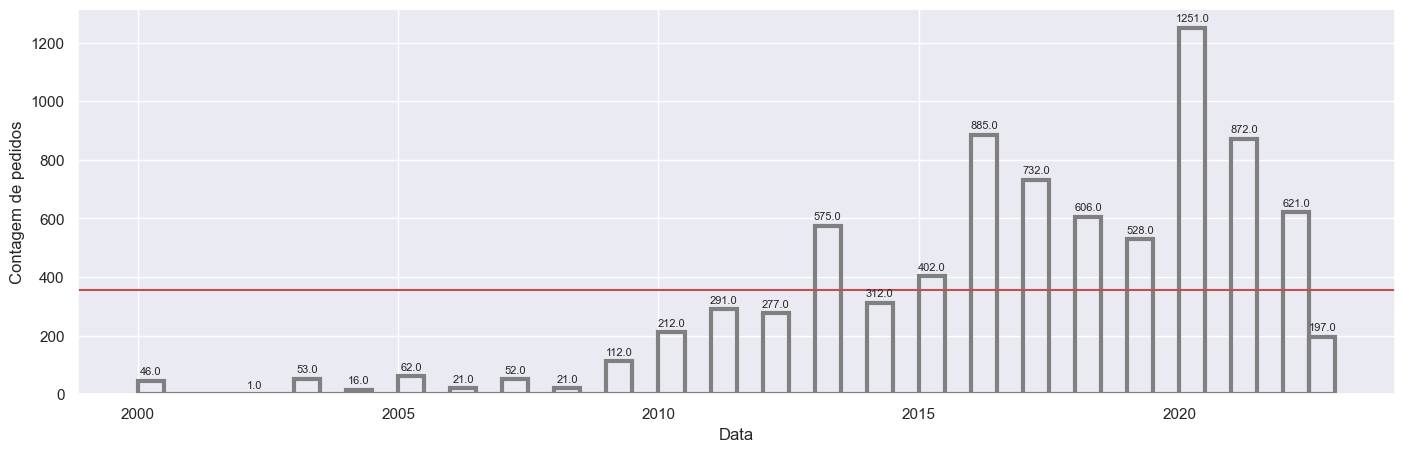

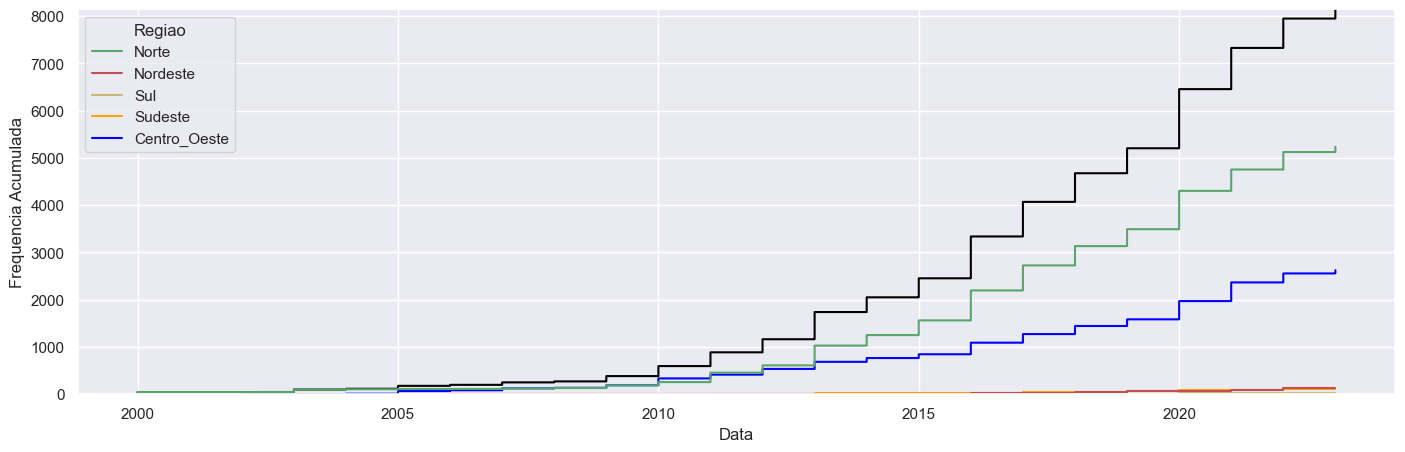

354.1304347826087

In [6]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
palette = {'Norte':'g','Nordeste':'r','Sul':'y','Sudeste':'orange','Centro_Oeste':'blue'}


sns.set(rc={"figure.figsize":(17, 5)})
y=sns.histplot(join_333_regiao.query('Data >= 2000')['Data'], #Histplot simples
                stat='count', alpha=.4,binwidth=0.5,linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)) # Serve para ver a distribuição geral da quantidade de pedidos por ano

for c in y.containers:
    
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{h:0.1f}' if (h := v.get_height())  else '' for v in c ]
    
    # set the bar label
    y.bar_label(c, labels=labels, fontsize=8, padding=3)





y.set(xlabel='Data', ylabel='Contagem de pedidos')
#Plotando uma Linha Paralela que indica a Média ao longo dos 20 anos de numero de pedidos:
y.axhline(join_333_regiao.query('Data >= 2000')['Data'].value_counts().mean(),color ='r')
plt.show()

#f = sns.ecdfplot(eventos333_ativos_ouro['Data'], stat='proportion')#Plotando um grafico de frequencia relativa acumulativa
#Com este plot, podemos perceber quantos pedidos para cada ano influenciam a frequencia acumulada
#f.set(xlabel='Data', ylabel='Frequencia Relativa Acumulada')
#plt.show()

#Plotando quebrando por regiao
#Assim conseguimos saber quais regiões do Brasil possuem os maiores pedidos
#w = sns.histplot(data=join_333_regiao, x="Data", hue="Regiao", stat='count', alpha=.4, multiple='dodge',palette='Set2',
             #binwidth=1)
#w.set(xlabel='Data', ylabel='Contagem de pedidos')
#plt.show()

sns.ecdfplot(data=join_333_regiao.query('Data >= 2000'), x="Data", stat='count',color='black')
h = sns.ecdfplot(data=join_333_regiao.query('Data >= 2000'), x="Data", hue="Regiao", stat='count',palette=palette)

h.set(xlabel='Data', ylabel='Frequencia Acumulada')

plt.show()
join_333_regiao.query('Data >= 2000')['Data'].value_counts().mean()

## QUEBRANDO POR REGIAO Norte e Centro Oeste para o Evento 333

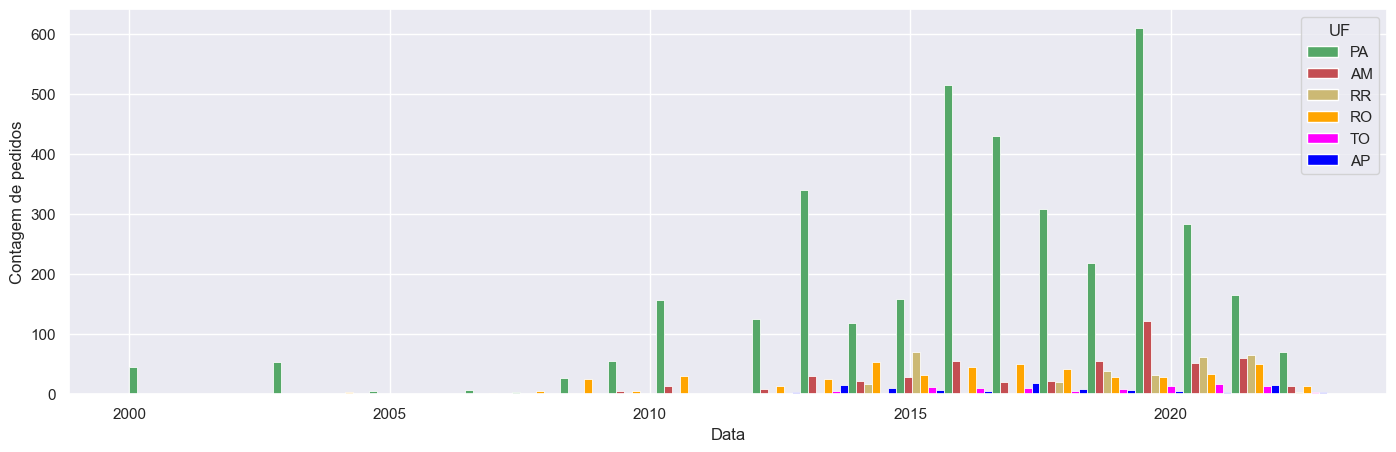

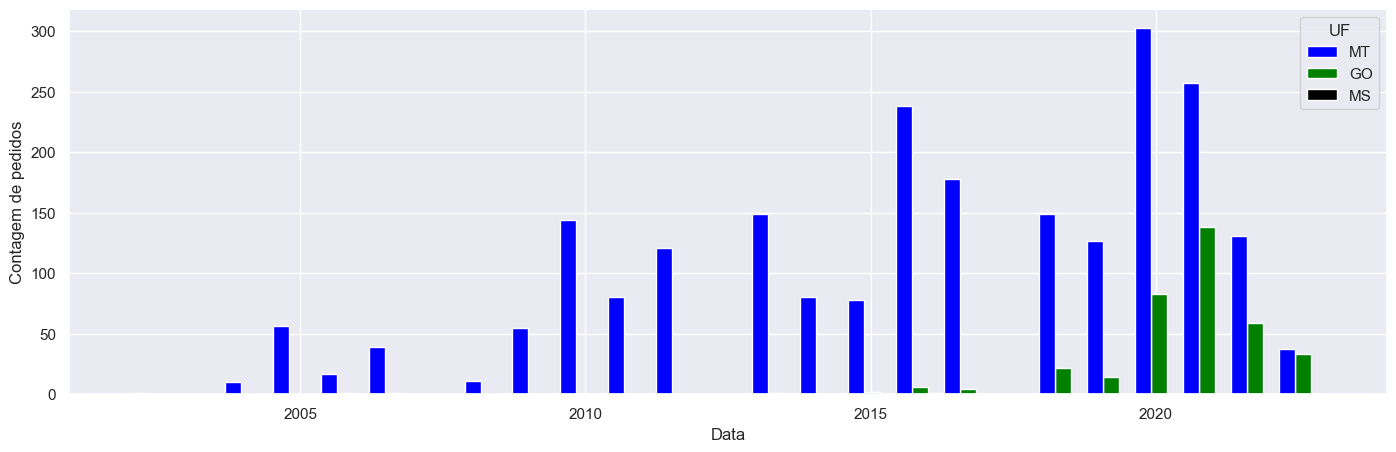

In [26]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})
#Fazendo um Histograma para Regiao Norte
paletteN = {'PA':'g','AM':'r','RR':'y','RO':'orange','AP':'blue','TO':'magenta'}
paletteCO = {'MT':'blue','GO':'green','MS':'black'}
y = sns.histplot(data=join_333_regiao.query('Data >= 2000').query('Regiao=="Norte"'), x="Data", hue="UF", stat='count', alpha=1, multiple='dodge',bins=25,palette=paletteN)

y.set(xlabel='Data', ylabel='Contagem de pedidos')
plt.show()

#Fazendo um histograma para Regiao Centro Oeste
w = sns.histplot(data=join_333_regiao.query('Data >= 2000').query('Regiao=="Centro_Oeste"'), x="Data", hue="UF", stat='count', alpha=1, multiple='dodge',bins=25,palette=paletteCO)
w.set(xlabel='Data', ylabel='Contagem de pedidos')
plt.show()



In [50]:
#join_333_regiao.query('Data >= 20a00').query('Regiao=="Norte"').Data.value_counts().sum()
join_333_regiao.query('Data >= 2000').query('Regiao=="Norte"').groupby('UF')['Data'].count()

UF
AM     517
AP     107
PA    3698
RO     497
RR     313
TO     103
Name: Data, dtype: int64

## Criando Análises para ver quantos processos foram pedidos para Evento 513

In [41]:
#Criando analises para evento 333
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 513
eventos513 = eventos.query('IDEvento == 513')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Relacionando os processos ativos com o df 513
eventos513_ativos = eventos513[eventos513['DSProcesso'].isin(prceossos_ativos['DSProcesso'])]
#Relacionando Ouro com os processos de evento 513
eventos513_ativos_ouro = eventos513_ativos[eventos513_ativos['DSProcesso'].isin(ouro['DSProcesso'])]
#Transformando o campo de data do evento513 em datetime
eventos513_ativos_ouro['Data'] = pd.to_datetime(eventos513_ativos_ouro.DTEvento).dt.year
#Tirando registros duplicados
eventos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)


#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_513 = mun[mun['DSProcesso'].isin(eventos513_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_513['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_513['UF']]
#Dando Join com o df eventos333_ativos_ouro para plotar o ano com regiao do brasil
join_513_regiao = eventos513_ativos_ouro.merge(mun_ouro_ativo_513,on='DSProcesso',how='inner')
join_513_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
full_join = join_513_regiao.merge(join_333_regiao,how='inner',on='DSProcesso')
full_join
#Temos agora o dataframe eventos513_ativos_ouro que contem informaçoes para os processos de ouro, com evento 513
#E tambem temos esse mesmo dataframe mas separado por UF e regiões do BRasil

C:\Users\User\AppData\Local\Temp\ipykernel_18600\640239451.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos513_ativos_ouro['Data'] = pd.to_datetime(eventos513_ativos_ouro.DTEvento).dt.year
C:\Users\User\AppData\Local\Temp\ipykernel_18600\640239451.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_18600\640239451.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,Unnamed: 0_x_x,DSProcesso,IDEvento_x,DTEvento_x,Evento__x,Data_x,Unnamed: 0_y_x,IDMunicipio_x,Municipios_x,UF_x,...,Unnamed: 0_x_y,IDEvento_y,DTEvento_y,Evento__y,Data_y,Unnamed: 0_y_y,IDMunicipio_y,Municipios_y,UF_y,Regiao_y
0,71881,650.004/2000,513,2018-04-26,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2018,5925,1503606,ITAITUBA,PA,...,71874,333,2000-03-21,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2000,5925,1503606,ITAITUBA,PA,Norte
1,71924,650.005/2000,513,2018-04-26,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2018,5929,1503606,ITAITUBA,PA,...,71917,333,2000-03-21,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2000,5929,1503606,ITAITUBA,PA,Norte
2,71968,650.006/2000,513,2018-04-26,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2018,5933,1503606,ITAITUBA,PA,...,71961,333,2000-03-21,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2000,5933,1503606,ITAITUBA,PA,Norte
3,72137,650.007/2000,513,2017-06-09,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2017,5937,1503606,ITAITUBA,PA,...,72130,333,2000-03-21,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2000,5937,1503606,ITAITUBA,PA,Norte
4,72184,650.008/2000,513,2018-04-26,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2018,5941,1503606,ITAITUBA,PA,...,72177,333,2000-03-21,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2000,5941,1503606,ITAITUBA,PA,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,8201451,867.530/2021,513,2022-05-04,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022,836212,5106505,POCONÉ,MT,...,8201448,333,2021-11-20,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,836212,5106505,POCONÉ,MT,Centro_Oeste
2259,8201484,867.531/2021,513,2022-05-04,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022,836216,5106505,POCONÉ,MT,...,8201481,333,2021-11-20,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,836216,5106505,POCONÉ,MT,Centro_Oeste
2260,8201936,867.551/2021,513,2022-09-29,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2022,836302,5108055,TERRA NOVA DO NORTE,MT,...,8201933,333,2021-11-25,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,836302,5108055,TERRA NOVA DO NORTE,MT,Centro_Oeste
2261,8204014,867.660/2021,513,2023-04-06,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,2023,836767,5100805,APIACÁS,MT,...,8204011,333,2021-12-27,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,836767,5100805,APIACÁS,MT,Centro_Oeste


## Fazendo Plot desses dois dataframes (evento 513)

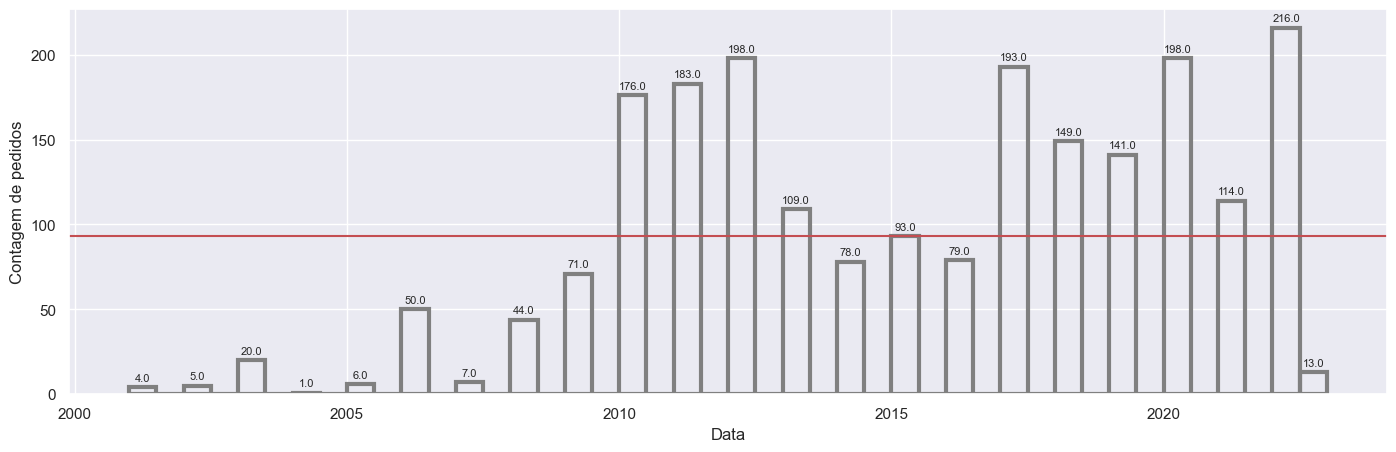

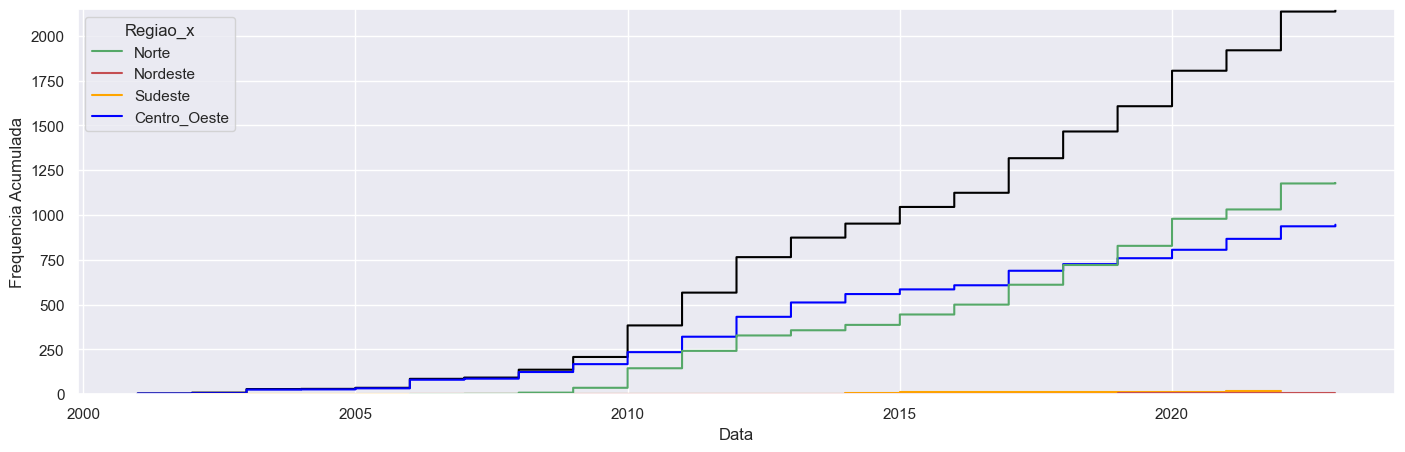

In [42]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})
palette = {'Norte':'g','Nordeste':'r','Sul':'y','Sudeste':'orange','Centro_Oeste':'blue'}
y=sns.histplot(full_join.query('Data_x >=2000')['Data_x'], #Histplot simples
                stat='count', alpha=.4,binwidth=0.5,linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)) # Serve para ver a distribuição geral da quantidade de pedidos por ano
for c in y.containers:
    
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{h:0.1f}' if (h := v.get_height())  else '' for v in c ]
    
    # set the bar label
    y.bar_label(c, labels=labels, fontsize=8, padding=3)
y.set(xlabel='Data', ylabel='Contagem de pedidos')
#Plotando uma Linha Paralela que indica a Média ao longo dos 20 anos de numero de pedidos:
y.axhline(full_join.query('Data_x >=2000')['Data_x'].value_counts().mean(),color ='r')
plt.show()

sns.ecdfplot(data=full_join.query('Data_x >=2000'), x="Data_x", stat='count',color='black')
h = sns.ecdfplot(data=full_join.query('Data_x >=2000'), x="Data_x", hue="Regiao_x", stat='count',palette=palette)

h.set(xlabel='Data', ylabel='Frequencia Acumulada')

plt.show()


## Quebrando Para Regiao Norte e Centro Oeste para evento 513

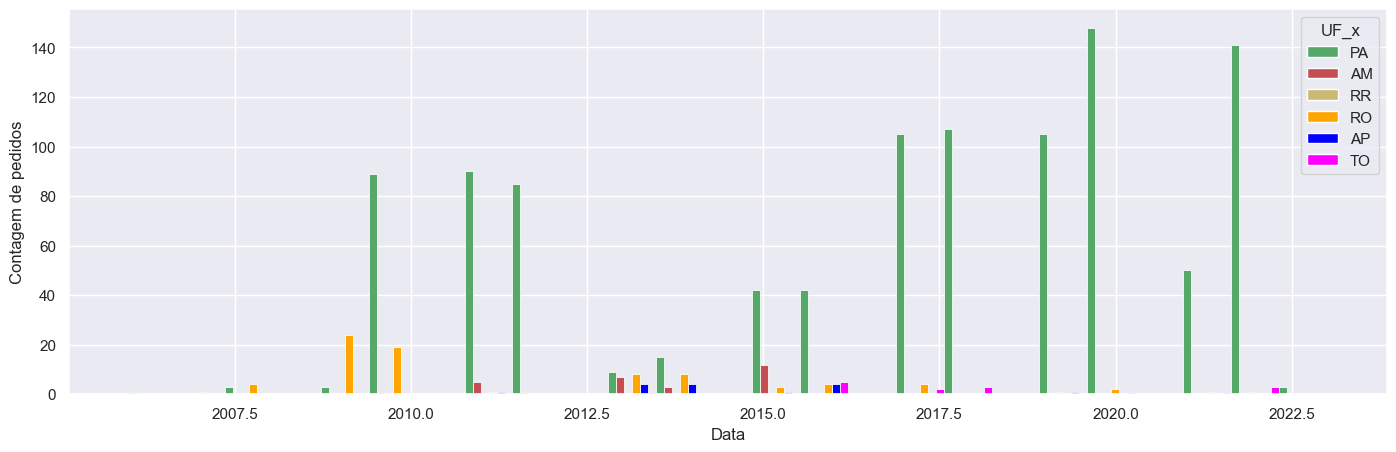

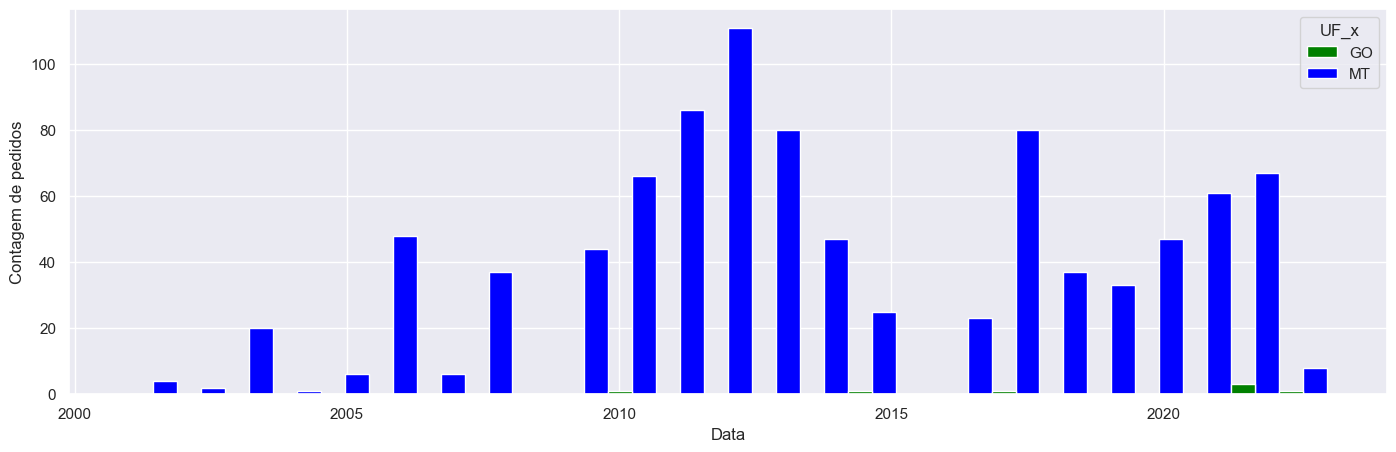

In [56]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})
#Fazendo um Histograma para Regiao Norte
paletteN = {'PA':'g','AM':'r','RR':'y','RO':'orange','AP':'blue','TO':'magenta'}
paletteCO = {'MT':'blue','GO':'green','MS':'black'}
y = sns.histplot(data=full_join.query('Data_x >= 2000').query('Regiao_x=="Norte"'), x="Data_x", hue="UF_x", stat='count', alpha=1, multiple='dodge',bins=25,palette=paletteN)

y.set(xlabel='Data', ylabel='Contagem de pedidos')
plt.show()

#Fazendo um histograma para Regiao Centro Oeste
w = sns.histplot(data=full_join.query('Data_x >= 2000').query('Regiao_x=="Centro_Oeste"'), x="Data_x", hue="UF_x", stat='count', alpha=1, multiple='dodge',bins=25,palette=paletteCO)
w.set(xlabel='Data', ylabel='Contagem de pedidos')
plt.show()



In [59]:
#join_333_regiao.query('Data >= 20a00').query('Regiao=="Norte"').Data.value_counts().sum()
full_join.query('Data_x >= 2000').query('Regiao_x=="Centro_Oeste"').groupby('UF_x')['Data_x'].count()

UF_x
GO      7
MT    939
Name: Data_x, dtype: int64

In [42]:
pessoa_fisica = pessoa.query('Pessoa=="F"')
pessoa_juridica = pessoa.query('Pessoa=="J"')
p_fisica_only = pessoa_fisica[~pessoa_fisica['DSProcesso'].isin(pessoa_juridica['DSProcesso'])]
juridico_certo = pessoa[ ~ pessoa['DSProcesso'].isin(p_fisica_only['DSProcesso'])]
#Criando dummys
p_fisica_only['Pessoa_Dummy'] = 'Pessoa Fisica'
juridico_certo['Pessoa_Dummy'] = 'Pessoa Juridica'
p_fisica_only.drop_duplicates('DSProcesso',keep = 'first',inplace=True)
juridico_certo.drop_duplicates('DSProcesso',keep = 'first',inplace=True)
pessoas_certo = pd.concat([p_fisica_only,juridico_certo])
pessoas_certo[['DSProcesso','Pessoa_Dummy','Pessoa_NOME']]

C:\Users\User\AppData\Local\Temp\ipykernel_18928\1802813544.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_fisica_only['Pessoa_Dummy'] = 'Pessoa Fisica'
C:\Users\User\AppData\Local\Temp\ipykernel_18928\1802813544.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juridico_certo['Pessoa_Dummy'] = 'Pessoa Juridica'
C:\Users\User\AppData\Local\Temp\ipykernel_18928\1802813544.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

,DSProcesso,Pessoa_Dummy,Pessoa_NOME
0,851.155/2016,Pessoa Fisica,Aline Silva Vieira Ferreira
3,851.155/2017,Pessoa Fisica,Valber do Carmo de Souza Gaia
24,851.156/1991,Pessoa Fisica,Caubi André Caldeira Fernandes
28,851.156/1993,Pessoa Fisica,OLAVO BILAC QUARESMA DE OLIVEIRA
30,851.156/1994,Pessoa Fisica,José Meireles Paiva
...,...,...,...
2100497,996.129/2019,Pessoa Juridica,Mineração Curimbaba Ltda
2100500,996.219/2006,Pessoa Juridica,ROBERTO BRAVO MARQUES PINHEIRO
2100503,996.659/2020,Pessoa Juridica,INDUSTRIA DE MARMORES ITALVA LTDA
2100506,996.675/2020,Pessoa Juridica,MARMORES DO BRASIL LTDA


C:\Users\User\AppData\Local\Temp\ipykernel_18928\3233154132.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  b_g['Data_x'].between(2000, 2009, inclusive=True),
C:\Users\User\AppData\Local\Temp\ipykernel_18928\3233154132.py:14: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  b_g['Data_x'].between(2010, 2019, inclusive=True),
C:\Users\User\AppData\Local\Temp\ipykernel_18928\3233154132.py:15: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  b_g['Data_x'].between(2020, 2023, inclusive=True)


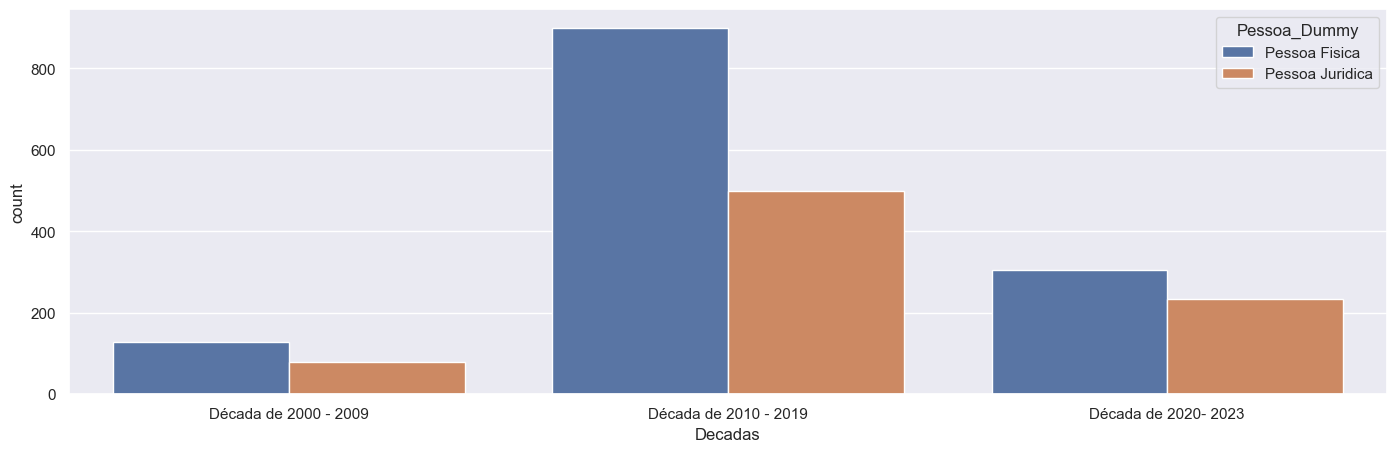

In [44]:
import seaborn as sns
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})
a = pessoas_certo[['DSProcesso','Pessoa_Dummy','Pessoa_NOME']]
b = full_join.query('Data_x >=2000').merge(a,how='inner',on='DSProcesso')
b.drop_duplicates("DSProcesso",keep='last',inplace=True)
b_g = b.groupby(['Pessoa_Dummy'],as_index=False).Data_x.value_counts()
b_g['Decadas'] =np.select(
    [
        
        b_g['Data_x'].between(2000, 2009, inclusive=True),
        b_g['Data_x'].between(2010, 2019, inclusive=True),
        b_g['Data_x'].between(2020, 2023, inclusive=True)
    ],
    [
        
        'Década de 2000 - 2009',
        'Década de 2010 - 2019',
        'Década de 2020- 2023'
    ]
)
b_g_g = b_g.groupby(['Decadas','Pessoa_Dummy'],as_index=False)['count'].sum()
sns.barplot(data=b_g_g, x="Decadas", y="count", hue="Pessoa_Dummy")
plt.show()


In [18]:
import seaborn as sns
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})
a = pessoa[['DSProcesso','Pessoa','Pessoa_NOME']]
b = full_join.merge(a,how='inner',on='DSProcesso')
b.drop_duplicates("DSProcesso",keep='last',inplace=True)

full_join.columns

Index(['Unnamed: 0_x_x', 'DSProcesso', 'IDEvento_x', 'DTEvento_x', 'Evento__x',
       'Data_x', 'Unnamed: 0_y_x', 'IDMunicipio_x', 'Municipios_x', 'UF_x',
       'Regiao_x', 'Unnamed: 0_x_y', 'IDEvento_y', 'DTEvento_y', 'Evento__y',
       'Data_y', 'Unnamed: 0_y_y', 'IDMunicipio_y', 'Municipios_y', 'UF_y',
       'Regiao_y'],
      dtype='object')